## M/M1

### M1

We find a fast algorithm of computing M1 of a polytope on the plane

In [3]:
import numpy as np 
from scipy import integrate
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [4]:
pentagon = [[1,1], [0,2], [-1,1], [-1,-1], [1,-1]]
square = [[1,1], [-1,1], [-1,-1], [1,-1]]
triangle = [[1,0], [0,1], [-1,-1]]
simplex = [[0,0], [1,0], [0,1]]

**Volume**

In [5]:
def volume(polygon):
        # Must be counter clock-wise oriented polygon
        """Compute the volume of the polytope"""
        vertices = polygon[:]
        vertices.append(vertices[0]) #repeat the first point to create a 'closed loop'
        xs, ys = zip(*vertices) #create lists of x and y values
        volume = 0
        for i in range(len(polygon)):
            L = (1/2) * (xs[i] * ys[i+1] - xs[i+1] * ys[i]) # volume of triangle
            volume += L
        return volume

In [6]:
volume(simplex)

0.5

**Plot function of polytopes**

In [7]:
def plot_polytope(polygon):
        vertices = polygon[:]
        vertices.append(vertices[0])
        xs, ys = zip(*vertices) #create lists of x and y values
        plt.figure()
        plt.plot(xs,ys) 
        plt.show()

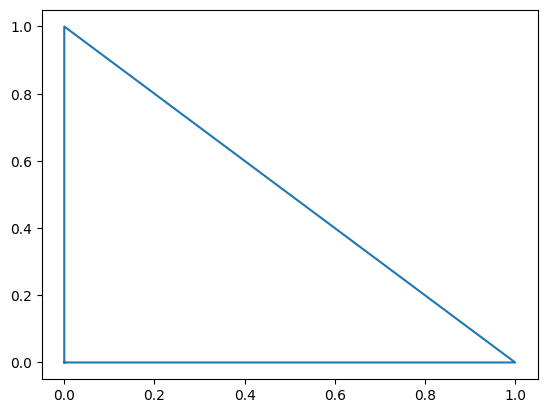

In [8]:
plot_polytope(simplex)

**Finding the polar**

In [9]:
def polar(polygon): 
    vertices = polygon[:]
    vertices.append(vertices[0])
    polar_polytope = []
    xs, ys = zip(*vertices)
    for i in range(len(polygon)): 
        L = xs[i] * ys[i+1] - xs[i+1] * ys[i]
        polar_x = (ys[i+1] - ys[i])/ L
        polar_y = (xs[i] - xs[i+1])/ L
        polar_polytope.append([polar_x, polar_y])
    return polar_polytope

Reality check

In [10]:
polar(square)

[[0.0, 1.0], [-1.0, 0.0], [0.0, -1.0], [1.0, 0.0]]

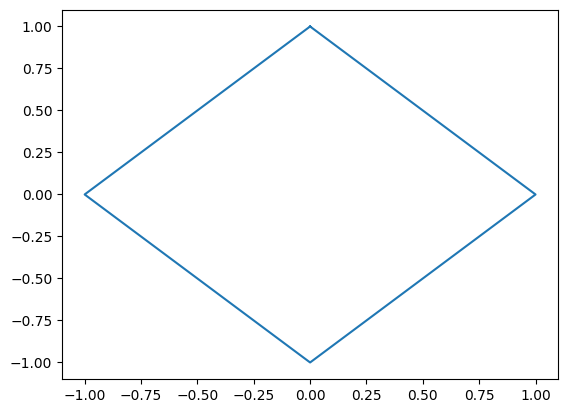

In [11]:
plot_polytope(polar(square))

**M**


In [12]:
def M(polytope): 
    return 2 * volume(polytope) * volume(polar(polytope))

Reality check

In [13]:
M(square), M(triangle)

(16.0, 13.5)

### Computing h1

**Auxiliary functions**

In [14]:
def f(x): 
    if x != 0: 
        return (np.exp(x) - 1)/x 
    else: 
        return 1

In [15]:
def g(x,y): 
    if x != y:
        return (f(x) - f(y))/(x-y)
    elif x == y and x != 0:
        return (1/x) * (np.exp(x) - f(x))
    else:
        return 1/2

**e^h1 of polytope**

In [16]:
def exph1(polygon, x, y): 
    vertices = polygon[:] # Make a copy of the vertices
    exph1 = 0 
    vertices.append(vertices[0])
    z = np.array([x, y])
    for i in range(len(polygon)): 
        M = np.array([vertices[i], vertices[i+1]]).T
        xi = M.T.dot(z)[0]
        eta = M.T.dot(z)[1]
        exph1 += np.linalg.det(M) * g(xi, eta)
    return exph1/ volume(vertices)

Reality check for the square

In [17]:
def exph1sq(x,y): 
    return (f(x)+f(-x)) * (f(y)+f(-y)) / 4

In [18]:
x, y = 2, 3
exph1sq(x,y) - exph1(square, x, y)

0.0

**Computing M1**

In [19]:
def M1(polygon):
    prec = 50
    def G(x,y):
        return 1/(exph1(polygon, x, y))
    L1polar = integrate.dblquad(G, -prec, prec, -prec, prec)
    return L1polar[0] * volume(polygon)

Reality check for the square

In [20]:
M1(square) / (np.pi**4)

1.0000000000000027

### M/M1 of a family of hexagons

In [21]:
def Hexagon(t):
    return [[1,1], [t, 2], [-1,1], [-1,-1], [-t, -2], [1,-1]]

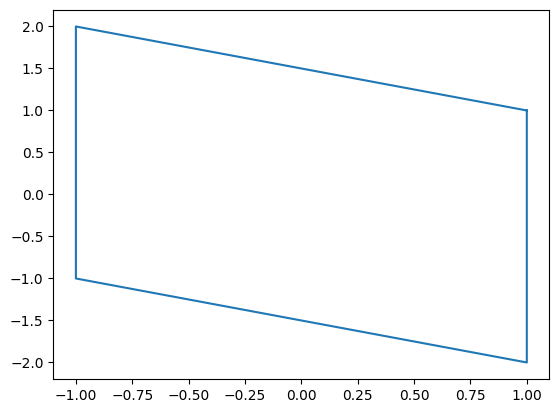

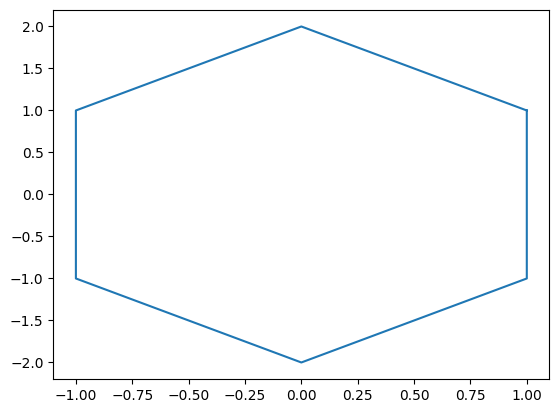

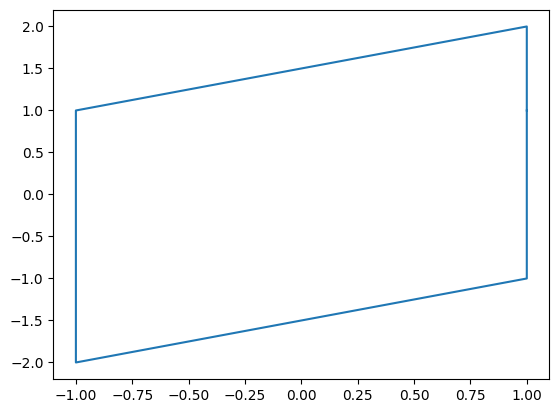

In [22]:
plot_polytope(Hexagon(-1))
plot_polytope(Hexagon(0))
plot_polytope(Hexagon(1))

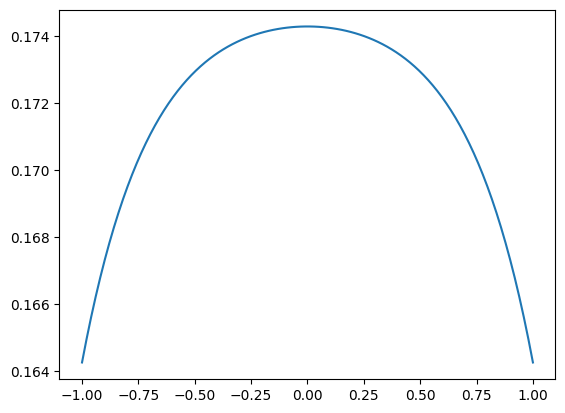

In [23]:
xs = np.linspace(-1, 1, 100)
ys = []
for x in xs: 
    ys.append(M(Hexagon(x))/ M1(Hexagon(x)))
plt.figure()
plt.plot(xs,ys) 
plt.show()

## $\mathcal{M}_p$

Let us start with $h_p$. As $h_{p,K}(y) = \frac1p h_{1, K}(py)$, $e^{h_{p,K}(y)} = (e^{h_{1,K}(py)})^{1/p}$ thus we can just use $h_1$: 

In [13]:
def exph(p, polygon, x, y): 
    return (exph1(polygon, p*x, p*y)) ** (1/p); 

Therefore, for $\mathcal{M}_p$ we have:

In [33]:
def M(p, polygon):
    prec = 50
    def G(x,y):
        return 1/(exph(p, polygon, x, y))
    Lppolar = integrate.dblquad(G, -prec, prec, -prec, prec)
    return Lppolar[0] * volume(polygon)

$\mathcal{M}_2/ \mathcal{M}_1$ for Hexagons under sliding

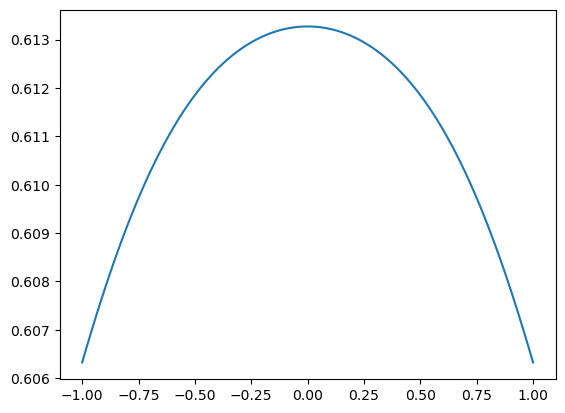

In [37]:
xs = np.linspace(-1, 1, 100)
ys = []
for x in xs: 
    ys.append(M(2, Hexagon(x))/ M(1, Hexagon(x)))
plt.figure()
plt.plot(xs,ys) 
plt.show()

$\mathcal{M}_5/ \mathcal{M}_2$ for hexagons under sliding

/var/folders/6r/4qb5_97j4_79wcm7tglp239c0000gn/T/ipykernel_86744/3561695017.py:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) - 1)/x


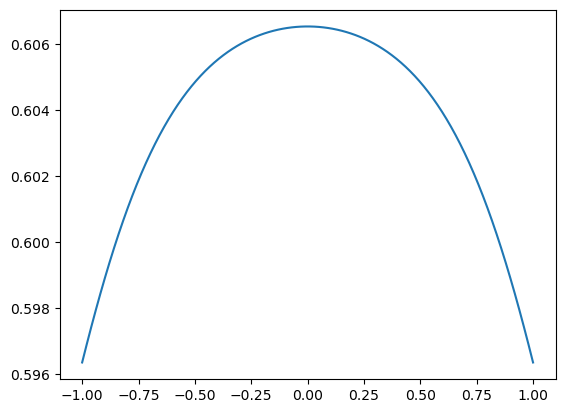

In [38]:
xs = np.linspace(-1, 1, 100)
ys = []
for x in xs: 
    ys.append(M(5, Hexagon(x))/ M(2, Hexagon(x)))
plt.figure()
plt.plot(xs,ys) 
plt.show()

$\mathcal{M}_1/ \mathcal{M}_3$

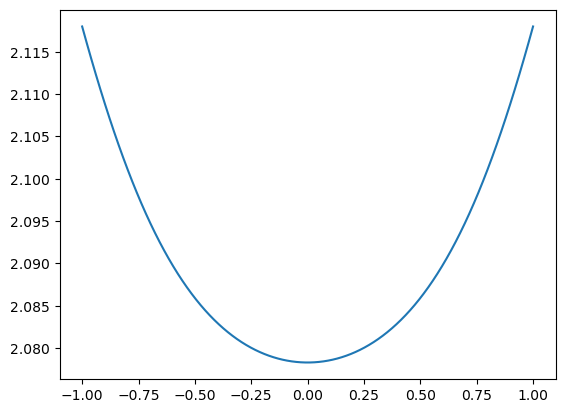

In [39]:
xs = np.linspace(-1, 1, 100)
ys = []
for x in xs: 
    ys.append(M(1, Hexagon(x))/ M(3, Hexagon(x)))
plt.figure()
plt.plot(xs,ys) 
plt.show()

In [44]:
import math

In [65]:
lambda1 = (1 + math.sqrt(5))/ 2
lambda2 = (1 - math.sqrt(5))/ 2

v1 = np.array([lambda1, 1])
v2 = np.array([lambda2, 1])

P = np.array([
    [lambda1 , lambda2], 
    [1,  1]
])

In [76]:
np.dot(v1, v1) - lambda1

2.0

In [87]:
Q =  np.array([
    [lambda1/(math.sqrt(2+lambda1)), lambda2/(math.sqrt(2 + lambda2))], 
    [1/ (math.sqrt(2 + lambda1)), 1/(math.sqrt(2 + lambda2))]
])

np.dot(Q, Q.T)

array([[1.00000000e+00, 8.42194643e-17],
       [8.42194643e-17, 1.00000000e+00]])

In [94]:
A = np.array([
    [1, 1], 
    [1, 0]
])

D = np.array([
    [lambda1, 0], 
    [0, lambda2]
])

In [95]:
np.dot(np.dot(Q, D), Q.T)

array([[1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 8.42194643e-17]])

-0.6180339887498949